<a href="https://colab.research.google.com/github/PandolfiJoaquin/Kaggle_intermediate_competition/blob/main/Kaggle_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [394]:
import pandas as pd
import sklearn
sklearn.set_config(transform_output="pandas")
!pip install category_encoders
import category_encoders as ce
# from sklearn.model_selection import train_test_split


In [395]:
# train_validation = pd.read_csv('train.csv')
train_validation = pd.read_csv('/content/train.csv')

In [396]:
cut = int(len(train_validation)*0.8)
X_train = train_validation.iloc[:cut].drop('num_sold',axis = 1)
y_train = train_validation.iloc[:cut].loc[:,'num_sold'] #a Serie, not a df

X_validation = train_validation.iloc[cut:].drop('num_sold',axis = 1)
y_validation = train_validation.iloc[cut:].loc[:,'num_sold'] #a Serie, not a df

# Data exploration and pre-processing

In [397]:
X_train.head()

,id,date,country,store,product
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [398]:
train_validation.info() # no nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [399]:
def its_ordered(df):
    for i in range(1,len(df.date)):
        ordered = True
        if df.date[i] < df.date[i-1]:
            ordered = False
            print(i)
            break

    return 'yes' if ordered else 'no'

its_ordered(train_validation)

'yes'

## visual analysis

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
train_validation.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [402]:
df = train_validation

In [403]:
df.groupby('product').agg({'num_sold': 'sum', 'id': 'count'})

,num_sold,id
product,,
Using LLMs to Improve Your Coding,6069281,27390
Using LLMs to Train More LLMs,5993975,27390
Using LLMs to Win Friends and Influence People,932564,27390
Using LLMs to Win More Kaggle Competitions,5068313,27390
Using LLMs to Write Better,4604192,27390


**observation**: the dataset is balanced among all products

In [404]:
pd.pivot_table(data = df, index = 'date', columns = 'product', values='num_sold', aggfunc='sum').head()

product,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
date,,,,,
2017-01-01,5131,5103,791,5086,3975
2017-01-02,4051,4058,639,3713,3102
2017-01-03,3887,3875,611,3651,3015
2017-01-04,3828,3866,560,3439,2823
2017-01-05,3649,3702,570,3380,2782


In [405]:
pd.pivot_table(data = df, index = 'date', columns='country', values='num_sold',aggfunc='sum').head()

country,Argentina,Canada,Estonia,Japan,Spain
date,,,,,
2017-01-01,2011,6134,2772,5274,3895
2017-01-02,1487,5081,2062,3983,2950
2017-01-03,1448,5049,1984,3742,2816
2017-01-04,1357,4710,1985,3784,2680
2017-01-05,1316,4629,1920,3609,2609


In [406]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [407]:
df['week'] = df.date.map(lambda x: int(x.strftime('%U')))

In [408]:
df['month'] = df.date.map(lambda x: int(x.strftime('%m')))

In [409]:
df_week = df.groupby(['week','country']).agg({'num_sold':'sum'}).reset_index()

In [410]:
df_month = df.groupby(['month','country']).agg({'num_sold':'sum'}).reset_index()

<Axes: xlabel='week', ylabel='num_sold'>

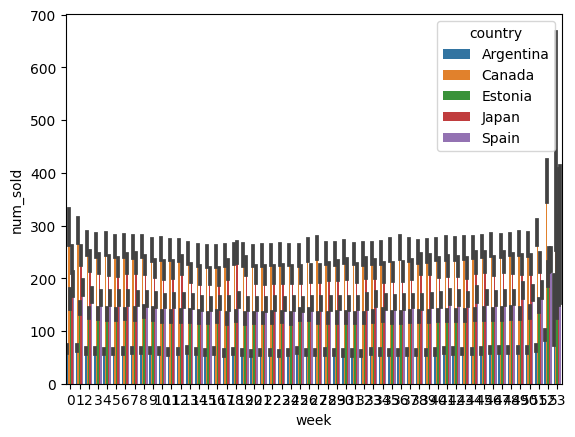

In [411]:
sns.barplot(data = df, y = 'num_sold', x = 'week', hue='country')

<Axes: xlabel='month', ylabel='num_sold'>

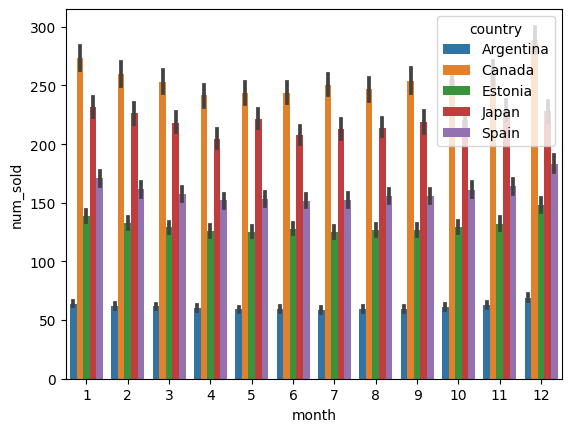

In [412]:
sns.barplot(data = df, y = 'num_sold', x = 'month', hue = 'country')

for a better understanding of the data an intresting visualization could be for each country the num_solds but divided on if it was vacations, pay week of the month, etc.

## preprocessing

In [413]:
X_train['date'] = pd.to_datetime(X_train['date'], format='%Y-%m-%d')
X_train['date'] = X_train.date.map(lambda x: int(x.strftime('%U')))

In [414]:
X_train.country.unique() #i'll use binary encoding just because this coud have 195 posible values.
# same thing with store and product

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [415]:
X_train.store.unique()

array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object)

In [416]:
X_train['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

In [417]:
be = ce.binary.BinaryEncoder(cols=['country','store','product'])


In [418]:
X_train = be.fit_transform(X_train)

In [419]:
X_train.set_index('id', inplace=True) #I don't want the id to be taken as a feature

In [420]:
X_train.date = X_train.date / 53 # i want to scale it to be able to use the same encoding for the final model. but its not necesary for the baseline


now I do the same preprocessing for the validation set

In [421]:
X_validation['date'] = pd.to_datetime(X_validation['date'], format='%Y-%m-%d')
X_validation['date'] = X_validation.date.map(lambda x: int(x.strftime('%U')))

In [422]:
X_validation = be.transform(X_validation)

In [423]:
X_validation.set_index('id', inplace=True)

In [424]:
X_validation.date = X_validation.date / 53

# Baseline

for a baseline i'll use just random forest regresion since there's a few pretty binary choices  that could help a lot to decide

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


## Training

In [ ]:
rf = RandomForestRegressor(
    criterion = 'absolute_error',
    random_state=27
)

# params = [
    # {'n_estimators': [10, 25, 50, 75, 100, 125, 150, 175]},
    # {'max_depth': [None, 2, 5]},
    # {'min_samples_split': [2, 4, 10]},
    # {'min_samples_leaf': [1, 10, 20, 30, 40, 50]},
    # {'bootstrap': [True, False]}
# ]
#
# rs = RandomizedSearchCV(
    # rf,
    # n_iter=10,
    # param_distributions=params,
    # random_state=27,
    # scoring='neg_mean_absolute_error'
# )

In [ ]:
# rs.fit(X_train, y_train)
rf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
rs.best_params_

In [ ]:
# model = rs.best_estimator_
rs.best_score_

In [ ]:
model = rf

## Testing

In [ ]:
y_pred = model.predict(X_validation)
from sklearn.metrics import accuracy_score, mean_absolute_error

In [ ]:
import numpy as np

In [ ]:
y_validation.max()

In [ ]:
mean_absolute_error(y_validation.fillna(0).values, y_pred)

In [ ]:
sns.histplot(y_validation)
sns.histplot(y_pred)
plt.title('distribution of predictions (orange) vs real values (blue)')
plt.show()

# complex models

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Model 1:

In [425]:
len(X_train)

109560

the idea now is to use a simple neural network, hoping it can comprehend the behaviour of sells acoording to the time of the year for the different countries and products (if there is one).

since there are around 11k samples, i'm hoping a more complex model won't cause overfitting

## Building the model

In [426]:
X_train.values

array([[0.01886792, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01886792, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01886792, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.98113208, 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.98113208, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98113208, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [427]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = keras.models.Sequential([
    Input(shape=(9,)),
    Dense(30, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='relu')
])
model.summary()
# keras.utils.plot_model(model, show_shapes = True)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 30)                300       
                                                                 
 dense_181 (Dense)           (None, 10)                310       
                                                                 
 dense_182 (Dense)           (None, 1)                 11        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [428]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 30)                300       
                                                                 
 dense_181 (Dense)           (None, 10)                310       
                                                                 
 dense_182 (Dense)           (None, 1)                 11        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [429]:
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate = 0.0001),
    metrics =['mean_absolute_error']
)

## Training

In [434]:
history = model.fit(X_train.values, y_train,
                    epochs = 25,
                    validation_data=(X_validation.values, y_validation)
                    )

Epoch 1/25
3424/3424 [==============================] - 15s 4ms/step - loss: 6041.7964 - mean_absolute_error: 55.8697 - val_loss: 7910.9253 - val_mean_absolute_error: 61.0516
Epoch 2/25
3424/3424 [==============================] - 9s 2ms/step - loss: 5750.2705 - mean_absolute_error: 54.4308 - val_loss: 7485.8931 - val_mean_absolute_error: 59.2611
Epoch 3/25
3424/3424 [==============================] - 7s 2ms/step - loss: 5352.6309 - mean_absolute_error: 52.4993 - val_loss: 6921.9463 - val_mean_absolute_error: 56.8443
Epoch 4/25
3424/3424 [==============================] - 8s 2ms/step - loss: 4936.3638 - mean_absolute_error: 50.4513 - val_loss: 6479.3662 - val_mean_absolute_error: 54.9557
Epoch 5/25
3424/3424 [==============================] - 9s 3ms/step - loss: 4524.8740 - mean_absolute_error: 48.3911 - val_loss: 6093.2539 - val_mean_absolute_error: 53.3023
Epoch 6/25
3424/3424 [==============================] - 7s 2ms/step - loss: 4115.7256 - mean_absolute_error: 46.3029 - val_loss: 

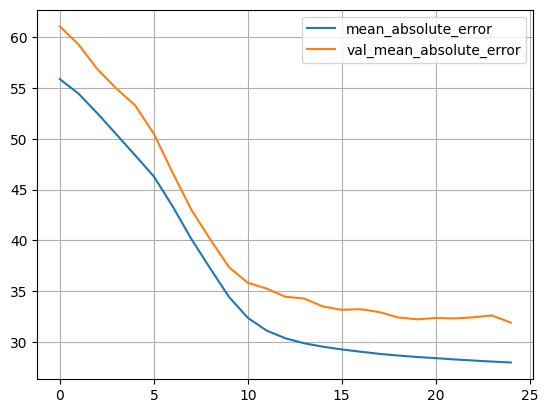

In [439]:
pd.DataFrame(history.history).loc[:,['mean_absolute_error','val_mean_absolute_error']].plot()
plt.grid(True)
plt.show()

## Testing

In [436]:
y_pred = model.predict(X_validation)

856/856 [==============================] - 1s 1ms/step


In [437]:
from sklearn.metrics import accuracy_score, mean_absolute_error
mean_absolute_error(y_validation, y_pred)

31.92210034053227

# so...

the model was able to achieve an acceptable error. now i can move on into making the final notebook and uploading my solution